# Experiment Description

<p> We are going to optimize an instruction prefix using the GRIPS method. We are going to search for better instruction candidates using 4 different kinds of phrase edits {add, delete, swap, and paraphrase}. </p>

For example: <b>GRIPS for Instruction Prefix</b><br><br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>

  - <b>Initial Template:</b><br>
  'In this task, your job is to generate the sentiment of the next sentence in the output. I hate watching this movie.'<br>

  - <b>GRIPS</b> will only update the instruction tokens "In this task, your job is to generate the sentiment of the next sentence in the output."<br>

<p>Navigate to the directory containing src</p>

In [1]:
import os

os.chdir("../../../../")

In [2]:
# define the internal cuda variables for gpu node in the vector's cluster.
!source ./src/reference_implementations/setup_gpu_worker.sh

Hostname: gpu034
Node Rank 0
Using Python from: /ssd003/home/snajafi/codes/PromptEngineering/prompt_torch-env/bin/python


# Experiment on SemEval Sentiment

In [3]:
!rm -r -f "/tmp/grips_experiments/semeval"
!mkdir -p "/tmp/grips_experiments"
!mkdir -p "/tmp/grips_experiments/semeval"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to complete. 

__Note__ --num_candidates denotes the Number of candidates in each iteration of the algorithm.

__Note__ --num_compose denotes the Number of edits composed to get one candidate.
Recommended value form --num_compose is 1 from the GRIPS paper.

__Note__ --level denotes level at which edit operations occur: {phrase, word, sentence, span}

In [30]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file ./resources/datasets/2018-Valence-oc-En-train.txt \
    --dev_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 2 \
    --training_steps 100 \
    --num_candidates 10 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:42:15.706611: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.706881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.707094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.707324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'the', 'sentiment', 'of', 'the', 'next', 'sentence', 'in', 'the', 'output', '.']
edits: ['del' 'del' 'del' 'sub' 'swap' 'del' 'del' 'del' 'sub' 'sub']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', 'is', 'also', 'known', 'as', '', 'n']
New Candidate:  I It's also referred to as n
Epoch: 0 | Batch: 5 | Mean Loss: 59.35245522795687 | Epoch Loss: 59.35245522795687 | Loss: 61.868072179967996

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
edits: ['del' 'del' 'swap' 'del' 'swap' 'swap' 'sub' 'swap' 'sub' 'del']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', '', 't', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating bat

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']
edits: ['swap' 'swap' 'swap' 'del' 'add' 'del' 'del' 'sub' 'swap' 'add']
Epoch: 1 | Batch: 3 | Mean Loss: 58.37258756691506 | Epoch Loss: 62.69651296584465 | Loss: 66.48091895299528

evaluating batch with prompt template: ['I']
edits: ['swap' 'sub' 'swap' 'del' 'add' 'del' 'add' 'swap' 'sub' 'del']
Epoch: 1 | Batch: 4 | Mean Loss: 58.416858278545085 | Epoch Loss: 61.79261446263231 | Loss: 59.08091895299528

evaluating batch with prompt template: ['I']
evaluating batch with prompt template: ['I']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']
edits: ['add' 'add' 'swap' 'add' 'swap' 'add' 'sub' 'sub' 'sub' 'add']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know']
New Candidate:  I don't know
Epoch: 1 | Batch: 5 | Mean Loss: 58.47029649758646 | Epoch Loss: 61.29915317055553 | Loss: 59.325

Below we evaluate what the performance of our original prompt was on the evaluation set

In [24]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:03:15.506617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [31]:
# test with the best saved prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:59:19.573130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.573486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.573782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.574069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [33]:
# You can also run the tensorboard from the node to monitor training status as we are training with grips.
!tensorboard --logdir=/tmp/grips_experiments/semeval --bind_all

2023-03-23 06:01:40.287621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:40.287653: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 06:01:41.745287: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:41.782965: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:41.784304: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# GRIPS Result on SemEval
We see that the GRIPS search could find the following optimal prompt tokens.

['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']

The new template increase the performance to 60.13% accuracy from 59.0% with the original instruction.



# Experiments on SST-2 Binary Sentiment Classification Task

Similar to SemEval, we can run the grips to further optimize the instruction at the start on the SST-2 dataset.

In [34]:
!rm -r -f "/tmp/grips_experiments/sst2"
!mkdir -p "/tmp/grips_experiments"
!mkdir -p "/tmp/grips_experiments/sst2"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to be completed

In [ ]:
# Search only for 100 training steps!
# Change the argument --grips_initial_prompt for another initial prompt.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 100 \
    --num_candidates 10 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 06:06:14.569190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 06:06:14.569301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 06:06:14.569375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 06:06:14.569444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'To', '', '.', 'to', 'generate', 'the', 'Sen', 'tim', 'ent', 'of', 'the', 'next', 'sentence', 'in', 'the', 'output', '.']
New Candidate:  In this task, your job is To . to generate That's right, the sentiment of That's right, the next sentence in That's right, the output.
Epoch: 0 | Batch: 2 | Mean Loss: 47.45618270819375 | Epoch Loss: 47.45618270819375 | Loss: 46.48383722198695

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'To', '', '.', 'to', 'generate', 'That', "'", 's', 'right', ',', 'the', 'sentiment', 'of', 'That', "'", 's', 'right', ',', 'the', 'next', 'sentence', 'in', 'That', "'", 's', 'right', ',', 'the', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'To', '', '.', 'to', 'generate', 'That', "'", 's', 'right', ',', 'the', 'sentiment', 'of', 'That', "'", 's', 'right', ',', 'the', 'next', 'sent

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', '', 'n']
Epoch: 0 | Batch: 8 | Mean Loss: 38.436555359586144 | Epoch Loss: 38.436555359586144 | Loss: 37.38526129261351

evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
W0323 06:11:52.981921 139674750378112 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0323 06:11:52.985821 139674750378112 arrow_dataset.py:

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'the', 'sentiment', 'of', 'the', 'next', 'sentence', 'in', 'the', 'output', '.']
edits: ['del' 'sub' 'swap' 'swap' 'swap' 'del' 'del' 'del' 'del' 'del']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'known', 'as', '', 'n']
Epoch: 0 | Batch: 15 | Mean Loss: 39.90180353775123 | Epoch Loss: 39.90180353775123 | Loss: 42.599668483239654

evaluating batch with prompt template: ['I', '', 'n']
edits: ['del' 'swap' 'del' 'del' 'swap' 'del' 'sub' 'del' 'swap' 'swap']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'known', 'as', '', 'n']
Epoch: 0 | Batch: 16 | Mean Loss: 40.180219535927236 | Epoch Loss: 40.180219535927236 | Loss: 44.35645950856743

evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['

evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'as', 'not', '', 'n']
evaluating batch with prompt template: ['', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', 'not', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', '', "'", 'mot', "'", 'm']
Epoch: 0 | Batch: 22 | Mean Loss: 40.35036837709758 | Epoch Loss: 40.35036837709758 | Loss: 42.17056241541601

evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'not', '', 'n']
W0323 06:17:58.477008 139674750378112 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282b

evaluating batch with prompt template: ['I', 'It', 'is', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', '', 'n', '', 'n']
evaluating batch with prompt template: ['', 'n', 'I', '', 'n']
New Candidate:  I It is also known as n
Epoch: 0 | Batch: 29 | Mean Loss: 40.53042731681812 | Epoch Loss: 40.53042731681812 | Loss: 36.80341161279643

evaluating batch with prompt template: ['I', 'It', 'is', 'also', 'known', 'as', '', 'n']
edits: ['sub' 'swap' 'add' 'del' 'swap' 'add' 'del' 'swap' 'swap' 'sub']
evaluating batch with prompt template: ['I', 'I', 'am', 't', 'is', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['is', 'ist', 'is', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', 'is', '', 'n', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', 'is', 'also', 'known', 'as']
evaluating batch with prompt template: ['I', 'It', 'I', 'also', 'known', 'as', '', 'n']
evaluating batch

evaluating batch with prompt template: ['I', 'There', 'is', '', 'n']
evaluating batch with prompt template: ['I', 'is', '', 'a', '', 'n']
evaluating batch with prompt template: ['', 'n', 'There', 'is', '', 'a', '', 'n']
evaluating batch with prompt template: ['I', 'There', 'is', '', 'a', 'It', "'", 's', 'also', 'called', '', 'n']
evaluating batch with prompt template: ['I', "'", 'm', 'There', 'is', '', 'a', '', 'n']
evaluating batch with prompt template: ['is', 'There', 'is', '', 'a', '', 'n']
evaluating batch with prompt template: ['I', 'There', 'is', '', 'a', 'I']
New Candidate:  I There is a It's also referred to as n
Epoch: 0 | Batch: 36 | Mean Loss: 40.95651519807722 | Epoch Loss: 40.95651519807722 | Loss: 37.640181178043036

evaluating batch with prompt template: ['I', 'There', 'is', '', 'a', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'There', 'is', '', 'a', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']

evaluating batch with prompt template: ['I', '', 'n']
edits: ['del' 'swap' 'del' 'del' 'del' 'del' 'sub' 'sub' 'del' 'swap']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
New Candidate:  I It's also referred to as n
Epoch: 0 | Batch: 42 | Mean Loss: 41.36040330834097 | Epoch Loss: 41.36040330834097 | Loss: 48.059883329907436

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
W0323 06:27:27.800742 139674750378112 builder.py:785] Found cached dataset sst2 (/

Below we evaluate what the performance of our original prompt was on the evaluation set

In [9]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

2023-03-07 12:40:36.357244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:40:36.357531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [10]:
# test on sst2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

2023-03-07 12:41:18.878868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.878981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 12:41:18.879155: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [13]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=/tmp/gradient_search_experiments/sst2 --bind_all

2023-03-07 13:09:58.701326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:09:58.701363: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 13:10:01.174543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:10:01.174646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:10:01.174716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# Results from SST2

As seen in the prediction, the instruction template ['tumour', 'negative', '.05.', 'Positive', 'respins', 'the', 'Contains', 'sentence', '.'] achieves an impressive 81.42% accuracy on the sst2 dev set while the original template "Generate the sentiment of the next sentence. " only achieved 68.46%! 

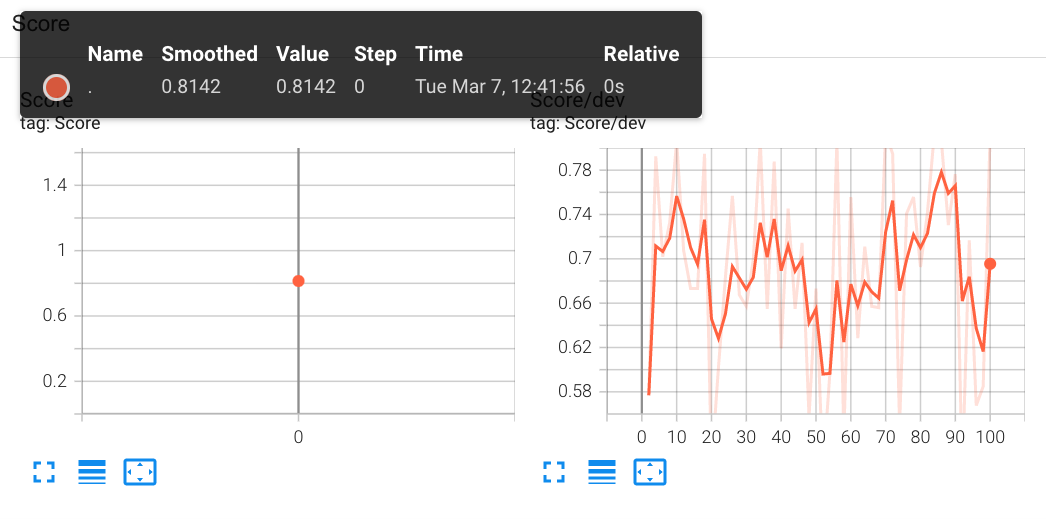

# Longer Training With Gradient-Search on SemEval and SST-2 datasets.

Using the Vector's Cluster and the Slurm scheduler, we can submit the following longer training jobs on
SemEval and SST-2 datasets. The script run_sentiment_experiments_gradient_search.sh will run training for longer. Run it in a cell below to analyze the results.

`!bash ./src/reference_implementations/prompt_zoo/training_scripts/run_sentiment_experiments_gradient_search.sh`

With longer training, we can further improve the result on semeval dataset to 62.36% accuracy! The optimal prompt now has both positive and negative labels incorporated.

__NOTE__: You must change the prediction file and model path to match your cluster username

In [16]:
# test on semeval using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name semeval \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/semval \
    --prediction_file /scratch/ssd004/scratch/snajafi/data_temp/torch-prompt/gradient_search/semval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 13:23:44.383442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.383698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.383908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.384115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 13:23:44.384151: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SemEval
Searched Template:
['negative', 'intrinsic', 'cazuri', 'negative', 'european', 'opéra', 'Fahrt', 'sentence', 'Positive']

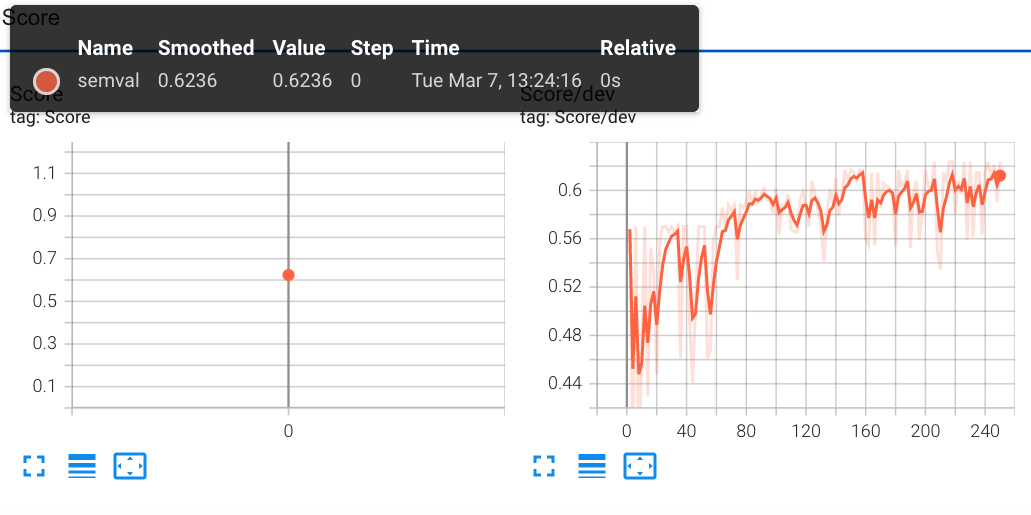

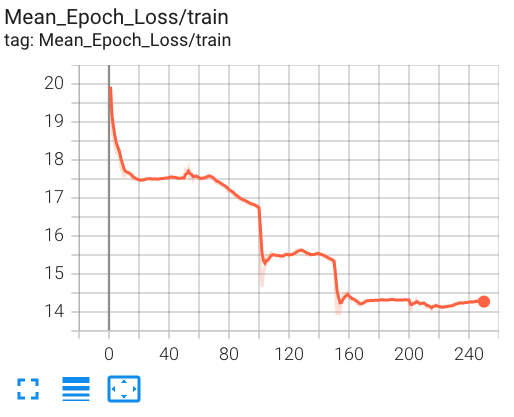

In [20]:
# test on sst2 using the model trained longer.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type gradient_search \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /scratch/ssd004/scratch/demerson/data_temp/torch-prompt/gradient_search/sst2 \
    --prediction_file /scratch/ssd004/scratch/demerson/data_temp/torch-prompt/gradient_search/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \

2023-03-07 15:29:01.011806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.011914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.011989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.012059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-07 15:29:01.012092: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Longer Results on SST-2
Searched Template:
['childcare', 'negative', '.05.', 'Positive', 'respins', 'wSt', 'Thank', 'sentence', '.']. In this case, running longer improves the accuracy of the prompt on the validation set from 81.42% to 83.37%

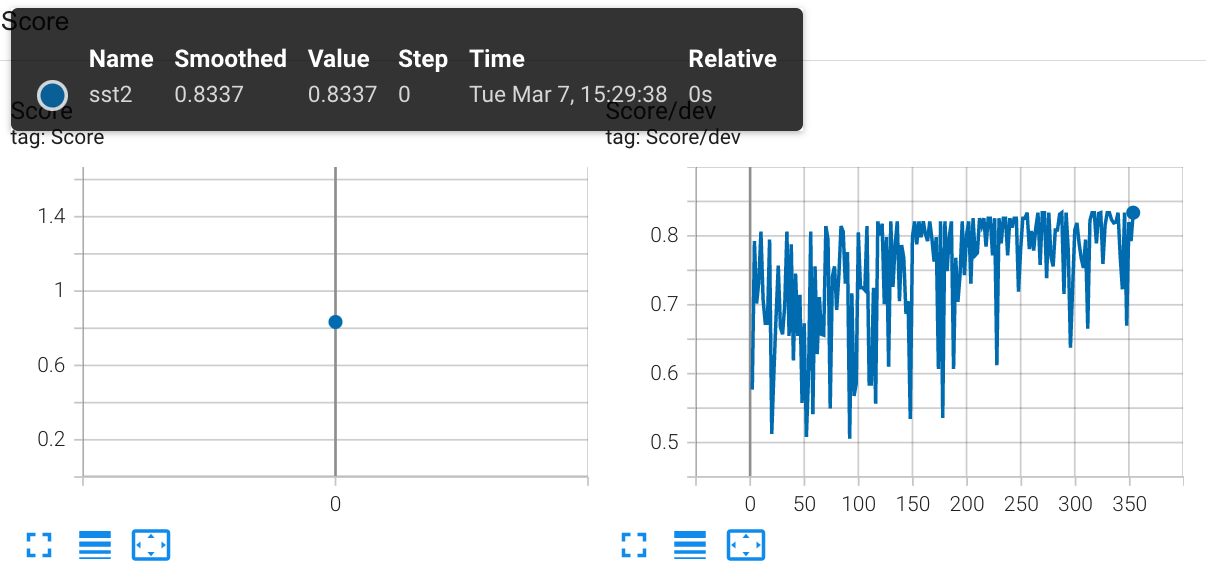

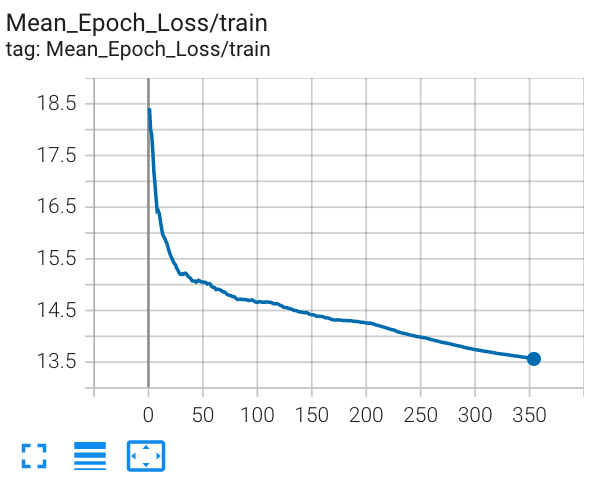